# LHCb Starter Kit 2023: Statistics I

**Hans Dembinski, TU Dortmund**

* Scikit-HEP project
* Reading simple ROOT files
* Histograms
* Data visualization
* Fitting

## About me

* Working with the LHCb experiment since 2016
* Before astroparticle physicist working with Pierre Auger Observatory and IceCube
* Statistics convener in LHCb (2019-2021, 2024-now)
* Interests
  * Statistics
  * High-performance computing
  * API design: "Make Interfaces Easy to Use Correctly and Hard to Use Incorrectly" *Scott Meyers*

## [Scikit-HEP project](https://scikit-hep.org)
* Provides high-performance data analysis tools in Python
* Partially funded by NSF grants
* Several LHCb developers: Eduardo Rodrigues, Chris Burr, myself, ...
* Core values
    * Specialized tools that integrate well with existing Python ecosystem
    * Easy to use for beginners
    * Flexible for power users
    * Good documentation
    * Easy installation

##  The power of combinatorics

Build everything from basic components that fit together

<img src="https://images.unsplash.com/photo-1621453417173-c4b72482b13e?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1171&q=80" width=45%/>

Image credit: Toni Zaat on Unsplash

## Important packages

* Python scientific stack
    * [Numpy](https://github.com/numpy/numpy): fast computation with arrays
    * [Scipy](https://github.com/scipy/scipy): integration, statistical distributions, special functions, ...
    * [Matplotlib](https://github.com/matplotlib/matplotlib): scientific plotting
    * [Numba](https://github.com/numba/numba): JIT Compiler for Python (very fast)
    * [Pandas](https://pandas.pydata.org/): Convenient processing of tabular data

* [Scikit-HEP Project](https://scikit-hep.org/)

    * [uproot](https://github.com/scikit-hep/uproot): fast reading and writing of ROOT Trees
    * [particle](https://github.com/scikit-hep/particle): get particle properties from PDG IDs
    * [boost-histogram](https://github.com/scikit-hep/boost-histogram): multi-dimensional generalised histograms
    * [iminuit](https://github.com/scikit-hep/iminuit): fitting and error computation package
    * [resample](https://github.com/scikit-hep/resample): Easy bootstrapping to compute uncertainty and bias
    * [pyhf](https://github.com/scikit-hep/pyhf): for histogram fitting/limit setting and preserving likelihoods

* Other packages
    * [jacobi](https://github.com/hdembinski/jacobi): Easy numerical error propagation
    * [numba-stats](https://github.com/hdembinski/numba_stats): Fast statistical distributions for fitting
    * [tabulate](https://github.com/astanin/python-tabulate): Convert data tables to various formats (LaTeX, HTML, Markdown, ...)
    * [scikit-learn](https://scikit-learn.org/stable/): Basic machine learning tools
    * [xgboost](https://xgboost.readthedocs.io/en/stable/): Gradient-boosting machine library that won many Kaggle competitions

**Install everything with `pip install LIBRARY`**

## Working with Jupyter notebooks

* I recommend to use [vscode](https://code.visualstudio.com/)
    * Very good Jupyter notebook support
    * Remote explorer: edit and run code on remote machines

## Prepare computing environment

* In terminal, create and enter virtual environment (you need Python-3.8 or later)
  ```
  python3 -m venv .venv
  source .venv/bin/activate
  ```
* Install packages
  ```
  python -m pip install --upgrade numba matplotlib uproot boost-histogram iminuit scipy particle numba_stats ipywidgets
  ```
  
* Download this notebook from indico and `example.root`, put latter into same folder

* Run `vscode` on the current folder, then open the notebook inside the editor OR
* Run
  ```
  python -m pip install ipykernel
  python -m ipykernel install --name "starterkit"
  jupyter notebook lecture_1.ipynb
  ```
  Then select `starterkit` as kernel

<img src="https://raw.githubusercontent.com/scikit-hep/uproot/master/docs/source/logo-300px.png" width=15%/>

* uproot provides fast and convenient access to ROOT trees

[<img src="https://raw.githubusercontent.com/scikit-hep/uproot/master/docs/logscales.png" width="60%"/>](https://raw.githubusercontent.com/scikit-hep/uproot/master/docs/logscales.png)

In [1]:
import uproot

print(f"uproot {uproot.__version__}")

uproot 5.2.2


In [2]:
f = uproot.open("example.root")
event = f["event"]
 
event.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
trk_len              | int32_t                  | AsDtype('>i4')
mc_trk_len           | int32_t                  | AsDtype('>i4')
trk_imc              | int32_t[]                | AsJagged(AsDtype('>i4'))
trk_px               | float[]                  | AsJagged(AsDtype('>f4'))
trk_py               | float[]                  | AsJagged(AsDtype('>f4'))
trk_pz               | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_px            | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_py            | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_pz            | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_pid           | int32_t[]                | AsJagged(AsDtype('>i4'))


* Tree contains fake simulated LHCb events
* Reconstructed tracks in simulation, branches with `trk_*`
* Truth in simulation, branches with `mc_trk_*`

* Some branches are 2D (e.g. `trk_px`)
  * First index iterates over events
  * Second index iterates over tracks per event
* Mathematical operators and slicing works on these arrays similar to Numpy
* Many numpy functions work on awkward arrays

In [3]:
import numpy as np
np.__version__

'1.24.4'

In [4]:
data = event.arrays()

np.sum(data["trk_len"])

5032

**Exercise**

* Use `np.sum` and an array mask to count how many events have zero tracks

In [5]:
# do exercise here

* For some operations and awkward arrays, we need the `awkward` library

In [6]:
import awkward as ak
ak.__version__

'2.6.1'

* For plotting, we use matplotlib

In [7]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.8.2'

**Exercise**
* Plot the branch `trk_px` with `matplotlib.pyplot.hist`
* Can you figure out from the error message why it does not work?
* Fix the issue with the function `ak.flatten`

In [8]:
# do exercise here

## Reading data from a large tree

* Tree often do not fit into memory (tree size > 100 GB and more possible)
* Iterate over chunks
* Chunk-wise processing works very well with histograms

<img src="https://raw.githubusercontent.com/scikit-hep/boost-histogram/develop/docs/_images/BoostHistogramPythonLogo.png" width=25%/>

* Python frontend to Boost.Histogram library in C++ from the Boost project
* Very fast and flexible
* Multi-dimensional histograms and other binned statistics (profiles!)
* Supports weighted data
* And much much more, see docs

In [9]:
import boost_histogram as bh
bh.__version__

'1.4.0'

In [10]:
# make an axis
xaxis = bh.axis.Regular(20, -2, 2)

# easy to make several histograms with same binning by reusing axis
h_px = bh.Histogram(xaxis)
h_mc_px = bh.Histogram(xaxis)

In [11]:
# incremental filling, only read branch "trk_px" from tree
for data in event.iterate(["trk_px"]):
    h_px.fill(ak.flatten(data["trk_px"]))

In [12]:
h_px

Histogram(Regular(20, -2, 2), storage=Double()) # Sum: 5032.0

In [13]:
print(h_px)

                 ┌───────────────────────────────────────────────────────────┐
[-inf,   -2) 0   │                                                           │
[  -2, -1.8) 1   │▏                                                          │
[-1.8, -1.6) 3   │▎                                                          │
[-1.6, -1.4) 17  │█▎                                                         │
[-1.4, -1.2) 25  │█▊                                                         │
[-1.2,   -1) 78  │█████▌                                                     │
[  -1, -0.8) 181 │████████████▉                                              │
[-0.8, -0.6) 308 │█████████████████████▊                                     │
[-0.6, -0.4) 453 │████████████████████████████████▏                          │
[-0.4, -0.2) 647 │█████████████████████████████████████████████▉             │
[-0.2,    0) 819 │██████████████████████████████████████████████████████████ │
[   0,  0.2) 782 │██████████████████████████████████

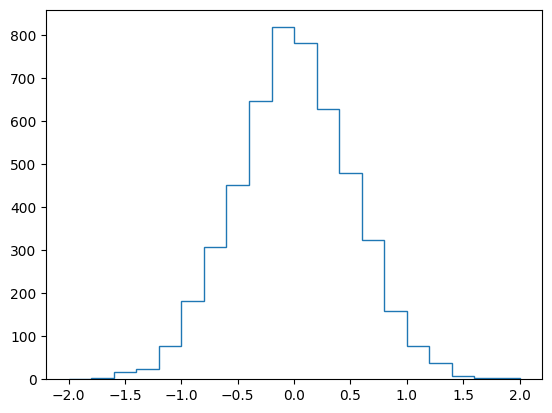

In [14]:
# plot histogram with plt.stairs
plt.stairs(h_px.values(), h_px.axes[0].edges);

* Histograms can be cut down to size after filling
  * Shrink axis range with slices and using `loc`
  * Make binning coarser with `rebin`
  * See docs of boost-histogram or extended lecture
* Beyond 1D histograms
  * Supports advanced axis types (e.g. category axis)
  * Supports higher dimensional histograms
  * Supports generalized histograms with binned statistics (aka "profile" in ROOT)
  * See docs of boost-histogram or extended lecture

## Fits

* Typical analysis work flow (often automated with Snakemake)
    1. Pre-select data
    2. Make histograms or profiles from pre-selected  data
    3. Fit histograms or profiles to extract physical parameters
* Many specialized fitting tools for individual purposes, e.g.: [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit)

* Generic libraries
    - [RooFit](https://root.cern.ch/roofit)
    - [zfit](https://github.com/zfit/zfit)
    - [pyhf](https://github.com/scikit-hep/pyhf)
    - [iminuit](https://github.com/scikit-hep/iminuit)
    - ...

* Fitting ("estimation" in statistics)
  * Adjust parametric **statistical model** to **dataset** and find **model parameters** which match dataset best
  * AI community calls this "learning"
  * **Estimate**: result of fit
* Dataset: samples $\{ \vec x_i \}$
* Model: Probability density or probability mass function $f(\vec x; \vec p)$ which depends on unknown parameters $\vec p$

* Conjecture: maximum-likelihood estimate (MLE) $\hat{\vec p} = \text{argmax}_{\vec p} L(\vec p)$ is optimal, with $L(\vec p) = \prod_i f(\vec x_i; \vec p)$
  * Equivalent: minimize negative log-likelihood (NLL), $\hat{\vec p} = \text{argmin}_{\vec p}(-\ln L(\vec p))$
* Limiting case of maximum-likelihood fit: **least-squares fit** aka chi-square fit

<img src="https://raw.githubusercontent.com/scikit-hep/iminuit/develop/doc/_static/iminuit_logo.svg" width=25%/>

* Python frontend to Minuit2 C++ library maintained by ROOT team at CERN 
* Maximum-likelihood and least-squares fits with error estimation

In [15]:
import iminuit
from iminuit import Minuit
iminuit.__version__

'2.25.2'

* iminuit vs. other packages
  * pyhf
    * Better choice when you need to compute limits and preserve the likelihood
  * zfit and RooFit
    * Help you build statistical models: automatic normalization & convolutions
      * This has to be done "by hand" in iminuit
    * Good for standard tasks, but restrict your freedom
  * iminuit
      * Has good documentation
      * Well-designed API
      * Is very flexible and open
      * Is very fast with numba

* Typical fit in particle physics: mass distribution of decay candidates with signal peak over smooth background
* Task: fit signal fraction to calculate signal yield (fraction * number of candidates)

In [16]:
# fast implementations of statistical distributions, API similar to scipy.stats
import numba_stats
from numba_stats import norm, truncexpon
numba_stats.__version__

'1.7.0'

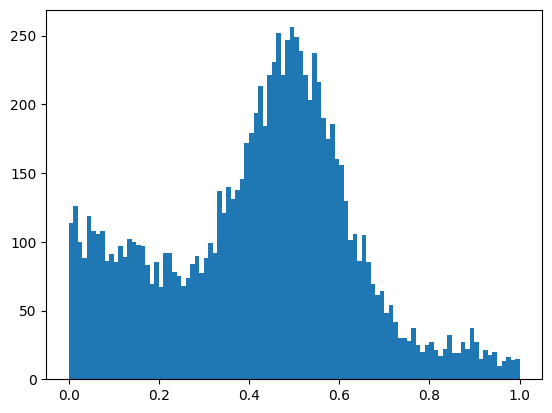

In [17]:
def make_data(size, seed=0):
    z=0.5
    mu=0.5
    sigma=0.1
    slope=0.5
    s = norm.rvs(mu, sigma, size=int(z * size), random_state=seed)
    b = truncexpon.rvs(0, 1, 0, slope, size=int((1-z) * size), random_state=seed)
    return np.append(s, b)

x1 = make_data(10_000)
plt.hist(x1, bins=100);

- Statistical model assumptions
  - Full sample is additive mixture of signal sample and background sample
  - Signal is normal-distributed; pdf is $\mathcal{N}(\mu, \sigma)$ with parameters $\mu$ and $\sigma$
  - Background is truncated exponential distribution

In [18]:
# model pdf
def model1(x, z, mu, sigma, slope):
    s = norm.pdf(x, mu, sigma)
    b = truncexpon.pdf(x, 0.0, 1.0, 0.0, slope)
    return (1 - z) * b + z * s

# we use NLL implementation provided by iminuit for convenience
from iminuit.cost import UnbinnedNLL

nll1 = UnbinnedNLL(x1, model1)
m = Minuit(nll1, z=0.5, mu=0.5, sigma=0.1, slope=1)

In [19]:
# need to set parameter limits or fit might fail
m.limits["z", "mu"] = (0, 1)
m.limits["sigma", "slope"] = (0, None)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -4741                      │              Nfcn = 99               │
│ EDM = 2.03e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │   0.489   │   0.009   │            │            │    0    │    1    │       │
│ 1 │ mu    │  0.4983   │  0.0020   │            │            │    0    │    1    │       │
│ 2 │ sigma │  0.0977   │  0.0019   │            │            │    0    │         │       │
│ 3 │ slope │   0.505   │   0.016   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │        z       mu    sigma    slope │
├───────┼─────────────────────────────────────┤
│     z │ 8.48e-05    -2e-6     9e-6 -0.06e-3 │
│    mu │    -2e-6 3.94e-06    -0e-6    -5e-6 │
│ sigma │     9e-6    -0e-6  3.7e-06    -9e-6 │
│ slope │ -0.06e-3    -5e-6    -9e-6 0.000268 │
└───────┴─────────────────────────────────────┘

**Exercise**

* Use interactive mode via `m.interactive()` to check how fit reacts to parameter changes
* Useful for debugging and to find starting values by hand

In [20]:
# do exercise here

* you can compute 2D confidence regions with `Minuit.mncontour`

**Exercise**
* Draw the likelihood profile contour of parameters `z` and `sigma` with `Minuit.draw_mncontour`
* Compute matrix of likelihood profile contours with `Minuit.draw_mnmatrix`

In [21]:
# do exercise here

## Faster fits?

* Option 1: accelerate NLL computation with `numba`
* Option 2: use binned data

In [22]:
x2 = make_data(1_000_000)

* Option 1
  * NLL computation is trivially parallelizable: log(pdf) computed independently for each data point
  * Numba allows us to exploit auto-vectorization (SIMD instructions) and parallel computing on multiple cores
  * See full lecture for an example to numba-JIT compile the NLL function
  * See [benchmark of iminuit + numba vs. `RooFit`](https://scikit-hep.org/iminuit/benchmark.html)

* Option 2
  * Often simpler: fit histograms
  * No bias from fitting histograms if done correctly, only loss in precision
  * Need model cdf instead of model pdf: $F(x; \vec p) = \int_{-\infty}^x f(x'; \vec p) \text{d}x'$

In [23]:
from iminuit.cost import BinnedNLL

# model is now a cdf!
def model3(x, z, mu, sigma, slope):
    s = norm.cdf(x, mu, sigma)
    b = truncexpon.cdf(x, 0.0, 1.0, 0.0, slope)
    return z * s + (1 - z) * b

w, xe = np.histogram(x2, bins=100, range=(0, 1))
nll3 = BinnedNLL(w, xe, model3)

In [24]:
m = Minuit(nll3, z=0.5, mu=0.5, sigma=1, slope=1)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 94.55 (χ²/ndof = 1.0)      │              Nfcn = 192              │
│ EDM = 1.76e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │ 501.0e-3  │  0.9e-3   │            │            │         │         │       │
│ 1 │ mu    │ 500.3e-3  │  0.2e-3   │            │            │         │         │       │
│ 2 │ sigma │ 100.06e-3 │  0.20e-3  │            │            │         │         │       │
│ 3 │ slope │  0.4982   │  0.0017   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │        z       mu    sigma    slope │
├───────┼─────────────────────────────────────┤
│     z │ 8.91e-07 -0.02e-6  0.10e-6  -0.7e-6 │
│    mu │ -0.02e-6 4.03e-08       -0 -0.05e-6 │
│ sigma │  0.10e-6       -0 3.98e-08 -0.10e-6 │
│ slope │  -0.7e-6 -0.05e-6 -0.10e-6 2.72e-06 │
└───────┴─────────────────────────────────────┘

* [See study of binned fits vs. unbinned fit for detailed comparison](https://iminuit.readthedocs.io/en/stable/notebooks/binned_vs_unbinned.html)
* With sufficient many bins (>= 20 in this case), increase in parameter uncertainties remains negligible
* Binned fits are (100-200)x faster than unbinned fits without using numba

## Other fits

* To fit yields (counts) instead of fractions, use `ExtendedUnbinnedNLL` or `ExtendedBinnedNLL`
* To fit (x, y) pairs, use `LeastSquares`
* To fit simulated templates, use `Template`
* See documentation how models should be constructed then

## Template fits

* Sometimes PDF/CDF not known in parametric form, but can be Monte-Carlo simulated
* Ansatz: Fit a histogram of simulation output (template) to data histogram
* Additional source of uncertainty from finite size of simulation
* Correct error propagation with Barlow-Beeston method, [Barlow and Beeston, Comput.Phys.Commun. 77 (1993) 219-228](https://doi.org/10.1016/0010-4655(93)90005-W)
* `iminuit.cost.Template`
  * Extension to (s)weighted data and simuation, [H. Dembinski, A. Abdelmotteleb, Eur.Phys.J.C 82 (2022) 11, 1043](https://doi.org/10.1140/epjc/s10052-022-11019-z)
  * Fast approximation to Barlow-Beeston method for unweighted data
  * Allows you to mix parametric models and templates

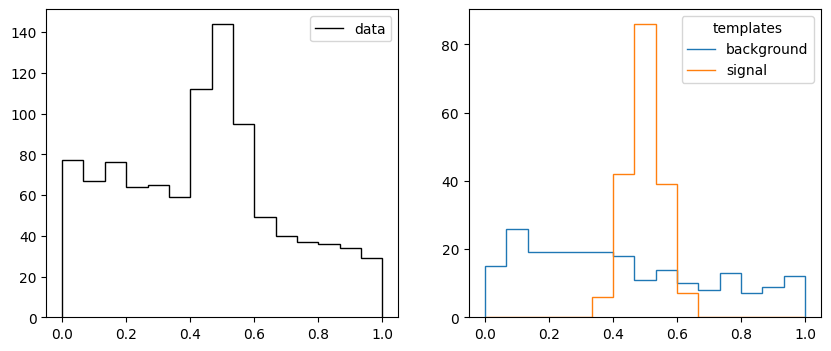

In [25]:
def make_data2(rng, nmc, truth, bins):
    xe = np.linspace(0, 1, bins + 1)
    b = np.diff(truncexpon.cdf(xe, 0, 1, 0, 1))
    s = np.diff(norm.cdf(xe, 0.5, 0.05))
    n = rng.poisson(b * truth[0]) + rng.poisson(s * truth[1])
    t = np.array([rng.poisson(b * nmc), rng.poisson(s * nmc)])
    return xe, n, t

rng = np.random.default_rng(1)
truth = 750, 250
xe, n, t = make_data2(rng, 200, truth, 15)

_, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].stairs(n, xe, color="k", label="data")
ax[0].legend();
ax[1].stairs(t[0], xe, label="background")
ax[1].stairs(t[1], xe, label="signal")
ax[1].legend(title="templates");

In [26]:
from iminuit.cost import Template

c = Template(n, xe, t)
m = Minuit(c, 1, 1)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.352 (χ²/ndof = 0.6)      │              Nfcn = 132              │
│ EDM = 2.75e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │    770    │    70     │            │            │    0    │         │       │
│ 1 │ x1   │    220    │    40     │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │       x0       x1 │
├────┼───────────────────┤
│ x0 │  4.3e+03   -0.8e3 │
│ x1 │   -0.8e3 1.32e+03 │
└────┴───────────────────┘

* With `Template` you can also fit a mix of template and parametric model
* Often template only needed for background(s)

**Exercise**

* With `make_data2` generate templates with 1 000 000 simulated points
* Fit this data with the `Template` cost function
* Compare parameter uncertainties

In [27]:
# do exercise here